# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

- Observations
    * The further you get away from the equator, the lower the temps generally are. 
    * Humidity, wind speed, and cloud cover are not correlated with latitude according to the scatter       plots.
    * The northern and southern hemispheres seem to mirror each other. 
    


In [1]:
#pip install citipy
#pip install openweathermapy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
response_json = []
city = []
country = []
coords = []
lat = []
lon = []
weather_list = []
weather = []
temp = []
humidity = []
wind = []
clouds = []
city_count = 0


url = "https://api.openweathermap.org/data/2.5/weather?q="

for x in (cities):
    city_count = city_count + 1
    print(f"Fetching weather data for city {city_count} {x}")
          
    post_response = requests.get(url + x + "&units=imperial&appid=" + api_key).json()
    
    try:
        city.append(post_response['name'])
        country.append(post_response['sys']['country'])
        coords.append(post_response['coord'])
        lat.append(post_response['coord']['lat'])
        lon.append(post_response['coord']['lon'])
        weather.append(post_response['weather'][0]['main'])
        temp.append(post_response['main']['temp'])
        humidity.append(post_response['main']['humidity'])
        wind.append(post_response['wind']['speed'])
        clouds.append(post_response['clouds']['all'])
  
    except KeyError: 
        print("Cannot find city")

Fetching weather data for city 1 kazalinsk
Cannot find city
Fetching weather data for city 2 sambava
Fetching weather data for city 3 chuy
Fetching weather data for city 4 belushya guba
Cannot find city
Fetching weather data for city 5 tasiilaq
Fetching weather data for city 6 yellowknife
Fetching weather data for city 7 komsomolskiy
Fetching weather data for city 8 westport
Fetching weather data for city 9 mataura
Fetching weather data for city 10 upernavik
Fetching weather data for city 11 ilulissat
Fetching weather data for city 12 nhulunbuy
Fetching weather data for city 13 plouzane
Fetching weather data for city 14 kaitangata
Fetching weather data for city 15 grand river south east
Cannot find city
Fetching weather data for city 16 port alfred
Fetching weather data for city 17 narsaq
Fetching weather data for city 18 pevek
Fetching weather data for city 19 busselton
Fetching weather data for city 20 caborca
Fetching weather data for city 21 lakatoro
Fetching weather data for city 

Fetching weather data for city 181 luderitz
Fetching weather data for city 182 mumford
Fetching weather data for city 183 gursahaiganj
Fetching weather data for city 184 namatanai
Fetching weather data for city 185 porto novo
Fetching weather data for city 186 port blair
Fetching weather data for city 187 north platte
Fetching weather data for city 188 jimenez
Fetching weather data for city 189 mrirt
Cannot find city
Fetching weather data for city 190 vardo
Fetching weather data for city 191 sitka
Fetching weather data for city 192 quimper
Fetching weather data for city 193 axim
Fetching weather data for city 194 bagotville
Fetching weather data for city 195 buta
Fetching weather data for city 196 urdzhar
Cannot find city
Fetching weather data for city 197 carnarvon
Fetching weather data for city 198 surt
Fetching weather data for city 199 beringovskiy
Fetching weather data for city 200 nizhneyansk
Cannot find city
Fetching weather data for city 201 taltal
Fetching weather data for cit

Cannot find city
Fetching weather data for city 363 klaksvik
Fetching weather data for city 364 mocuba
Fetching weather data for city 365 senneterre
Fetching weather data for city 366 labuhan
Fetching weather data for city 367 skibbereen
Fetching weather data for city 368 mossendjo
Fetching weather data for city 369 tommot
Fetching weather data for city 370 lata
Fetching weather data for city 371 umzimvubu
Cannot find city
Fetching weather data for city 372 malyye derbety
Fetching weather data for city 373 winnemucca
Fetching weather data for city 374 tawnat
Cannot find city
Fetching weather data for city 375 laibin
Fetching weather data for city 376 mindelo
Fetching weather data for city 377 bugene
Fetching weather data for city 378 basay
Fetching weather data for city 379 paamiut
Fetching weather data for city 380 rudnogorsk
Fetching weather data for city 381 el seibo
Fetching weather data for city 382 wanning
Fetching weather data for city 383 neuquen
Fetching weather data for city 

Fetching weather data for city 545 sorland
Fetching weather data for city 546 idukki
Fetching weather data for city 547 ulladulla
Fetching weather data for city 548 ketchikan
Fetching weather data for city 549 kashan
Fetching weather data for city 550 aasiaat
Fetching weather data for city 551 sinnamary
Fetching weather data for city 552 ust-uda
Fetching weather data for city 553 tokat
Fetching weather data for city 554 campbell river
Fetching weather data for city 555 laguna
Fetching weather data for city 556 shingu
Fetching weather data for city 557 canete
Fetching weather data for city 558 poltavka
Fetching weather data for city 559 savannah bight
Fetching weather data for city 560 barra do corda
Fetching weather data for city 561 kalmunai
Fetching weather data for city 562 iringa
Fetching weather data for city 563 tzaneen
Fetching weather data for city 564 birao
Fetching weather data for city 565 lazarev
Fetching weather data for city 566 ensenada
Fetching weather data for city 567

In [5]:

weather_data_df = pd.DataFrame({ "City": city,
                                "Country": country,
                               "Latitude": lat,
                               "Longitude": lon,
                               "Weather": weather,
                               "Temperature": temp,
                               "Humidity": humidity,
                               "Wind Speed": wind,
                               "Cloud Cover %": clouds})

#Writing to CSV without index. 
weather_data_df.to_csv('cities.csv', index = False)

weather_data_df.head()

,City,Country,Latitude,Longitude,Weather,Temperature,Humidity,Wind Speed,Cloud Cover %
0,Sambava,MG,-14.27,50.17,Rain,75.90,84,7.85,63
1,Chui,UY,-33.70,-53.46,Clear,64.87,75,7.85,0
2,Tasiilaq,GL,65.61,-37.64,Clouds,23.00,67,3.33,99
3,Yellowknife,CA,62.46,-114.35,Clouds,17.37,61,18.34,75
4,Yangi Marg`ilon,UZ,40.43,71.72,Clouds,50.00,61,2.24,100


In [6]:
### Convert Raw Data to DataFrame
#* Export the city data into a .csv.
#* Display the DataFrame



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

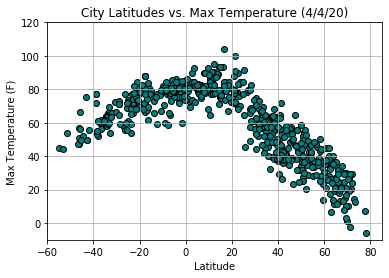

In [7]:
#Scatter plot Latitude vs. Tempreture 

x_axis = weather_data_df["Latitude"]
y_axis = weather_data_df["Temperature"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 120)
plt.xlim(-60, 85)
plt.title("City Latitudes vs. Max Temperature (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
#plt.savefig('images/lat_v_temp')

#### Latitude vs. Humidity Plot

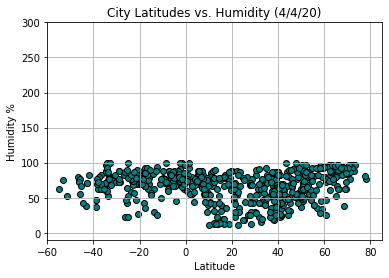

In [8]:
x_axis = weather_data_df["Latitude"]
y_axis = weather_data_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 300)
plt.xlim(-60, 85)
plt.title("City Latitudes vs. Humidity (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()
#plt.savefig('images/lat_v_hum')

#### Latitude vs. Cloudiness Plot

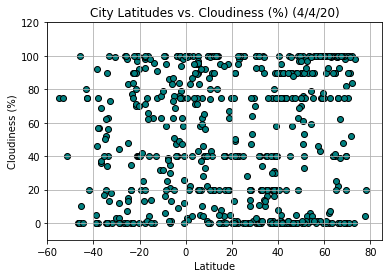

In [9]:
x_axis = weather_data_df["Latitude"]
y_axis = weather_data_df["Cloud Cover %"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 120)
plt.xlim(-60, 85)
plt.title("City Latitudes vs. Cloudiness (%) (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
#plt.savefig('images/lat_v_cloud')

#### Latitude vs. Wind Speed Plot

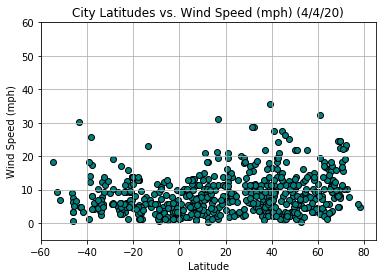

In [10]:
x_axis = weather_data_df["Latitude"]
y_axis = weather_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-5, 60)
plt.xlim(-60, 85)
plt.title("City Latitudes vs. Wind Speed (mph) (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
#plt.savefig('images/lat_v_wind')

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames
weather_data_df.head()

north = weather_data_df[weather_data_df["Latitude"] > 0]
south = weather_data_df[weather_data_df["Latitude"] < 0]

south.head()

,City,Country,Latitude,Longitude,Weather,Temperature,Humidity,Wind Speed,Cloud Cover %
0,Sambava,MG,-14.27,50.17,Rain,75.90,84,7.85,63
1,Chui,UY,-33.70,-53.46,Clear,64.87,75,7.85,0
6,Mataura,NZ,-46.19,168.86,Clear,47.07,76,3.44,0
9,Nhulunbuy,AU,-12.23,136.77,Clouds,77.00,94,4.70,75
11,Kaitangata,NZ,-46.28,169.85,Clear,57.00,76,0.76,0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9119655515716929


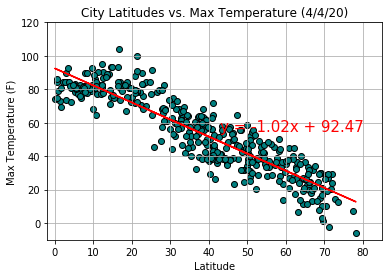

In [13]:
#Inputed data
x_axis = north["Latitude"]
y_axis = north["Temperature"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 120)
plt.xlim(-2, 85)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(43,55),fontsize=15,color="red")

plt.title("City Latitudes vs. Max Temperature (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_temp_n')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7388628870538401


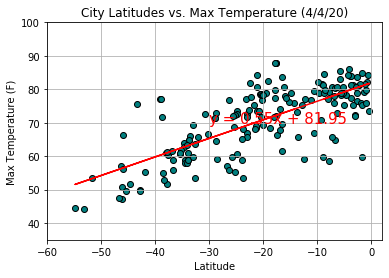

In [14]:
#Inputed data
x_axis = south["Latitude"]
y_axis = south["Temperature"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(35, 100)
plt.xlim(-60, 2)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")

plt.title("City Latitudes vs. Max Temperature (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_temp_s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2717865246978406


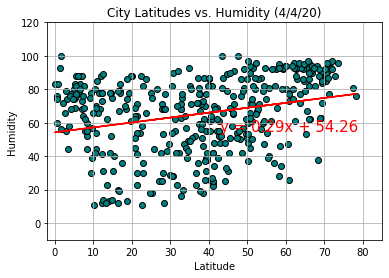

In [15]:
#Inputed data
x_axis = north["Latitude"]
y_axis = north["Humidity"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 120)
plt.xlim(-2, 85)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(43,55),fontsize=15,color="red")

plt.title("City Latitudes vs. Humidity (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_hum_n')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19222357416950622


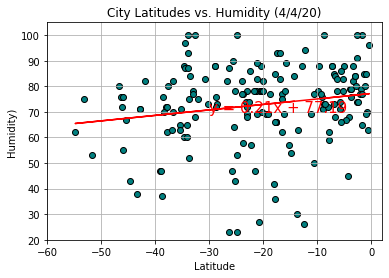

In [16]:
#Inputed data
x_axis = south["Latitude"]
y_axis = south["Humidity"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(20, 105)
plt.xlim(-60, 2)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")

plt.title("City Latitudes vs. Humidity (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_hum_s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04944922981234881


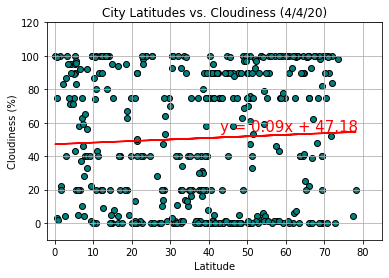

In [17]:
#Inputed data
x_axis = north["Latitude"]
y_axis = north["Cloud Cover %"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-10, 120)
plt.xlim(-2, 85)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(43,55),fontsize=15,color="red")

plt.title("City Latitudes vs. Cloudiness (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_cloud_n')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22473027051809638


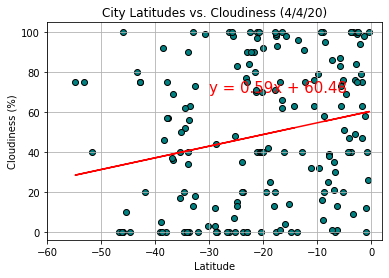

In [18]:
#Inputed data
x_axis = south["Latitude"]
y_axis = south["Cloud Cover %"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-4, 105)
plt.xlim(-60, 2)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")

plt.title("City Latitudes vs. Cloudiness (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_cloud_s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18030111977793137


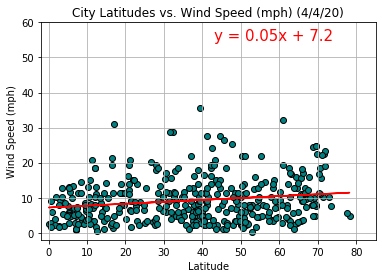

In [19]:
#Inputed data
x_axis = north["Latitude"]
y_axis = north["Wind Speed"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-2, 60)
plt.xlim(-2, 85)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(43,55),fontsize=15,color="red")

plt.title("City Latitudes vs. Wind Speed (mph) (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_wind_n')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29400642108758024


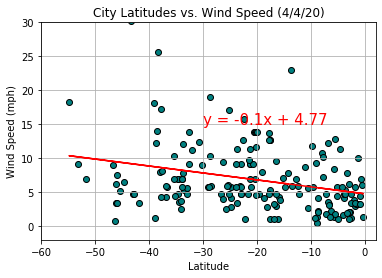

In [20]:
#Inputed data
x_axis = south["Latitude"]
y_axis = south["Wind Speed"]

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black")
plt.ylim(-2, 30)
plt.xlim(-60, 2)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

plt.title("City Latitudes vs. Wind Speed (4/4/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('images/lat_v_wind_s')